# Reinforcement Learning in Python

## 3. Epsilon Greedy vs Optimistic Initial Value

Here we compare the epsilon greedy algorithm vs optimistic initial value algorithm.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
class Bandit():
    '''
    m: True mean
    N: Number of samplings done
    mean: Calculated mean
    upper_limit: 0 for epsilon greedy
                 true to be upper limit for optimistic initial value
    '''
    # constructor
    def __init__(self, m, upper_limit=0):
        self.m = m
        self.mean = upper_limit
        self.N = 0
    
    # random pull 
    def pull(self):
        return np.random.randn()+self.m
    
    # updating mean
    def update(self, x):
        self.N += 1
        self.mean = (1-1.0/self.N)*self.mean + 1.0/self.N * x

In [3]:
# Experiment to compare three different bandits using epsilon greedy strategy 
def run_experiment_eps(m1, m2, m3, eps, N):
    '''
    m1, m2, m3: absolute mean of 3 bandits
    eps: probability with which exploration is done
    N: total number of trials
    '''
    bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]
    
    # a new array of length N, without initializing entries
    data = np.empty(N)
    
    for i in range(N):
        # epsilon greedy
        p = np.random.random()
        if p<eps:
            j = np.random.choice(3)
        else:
            j = np.argmax([b.mean for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)
        
        # for the plot
        data[i] = x
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)
    
    # plot moving average ctr
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.title('eps = %f' %eps)
    plt.show()
    
    for b in bandits:
        print(b.mean)
    return cumulative_average           

In [4]:
def run_experiment(m1, m2, m3, N, upper_limit=10):
  bandits = [Bandit(m1, upper_limit), Bandit(m2, upper_limit), Bandit(m3, upper_limit)]

  data = np.empty(N)
  
  for i in range(N):
    # optimistic initial values
    j = np.argmax([b.mean for b in bandits])
    x = bandits[j].pull()
    bandits[j].update(x)

    # for the plot
    data[i] = x
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  # plot moving average ctr
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  plt.xscale('log')
  plt.show()

  for b in bandits:
    print(b.mean)

  return cumulative_average

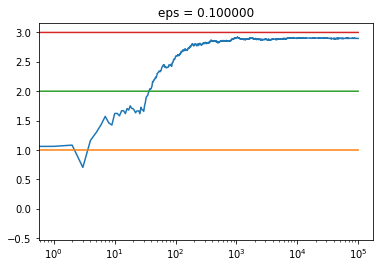

1.0138096765600577
2.0326077616051057
2.9962370103689753


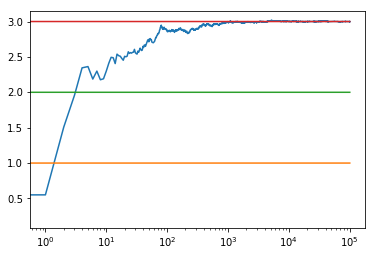

0.2220062063541094
0.8793631926370731
2.998373517403847


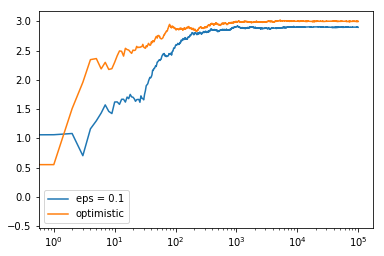

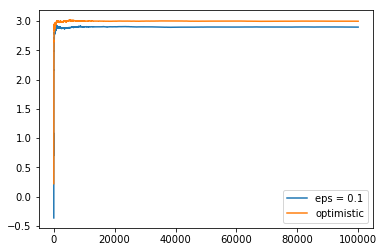

In [5]:
if __name__ == '__main__':
  c_1 = run_experiment_eps(1.0, 2.0, 3.0, 0.1, 100000)
  oiv = run_experiment(1.0, 2.0, 3.0, 100000)

  # log scale plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(oiv, label='optimistic')
  plt.legend()
  plt.xscale('log')
  plt.show()


  # linear plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(oiv, label='optimistic')
  plt.legend()
  plt.show()